In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df=pd.read_csv('Train_data.csv')
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,No,0.927000,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.03980,1947,3.0,very low
1,15901,0.8550,0.4560,0.4850,No,0.088400,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.85900,2020,2.4,low
2,9002,0.8270,0.4950,0.4990,No,0.000000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.70900,1950,2.6,very low
3,6734,0.6540,0.6430,0.4690,No,0.108000,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.96400,1974,2.4,low
4,15563,0.7380,0.7050,0.3110,No,0.000000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.78500,1973,3.4,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,No,0.000000,1,0.353,-5.461,Major,01-07-2014,0.4070,81.940,0.74400,2014,3.4,average
12223,1701,0.9120,0.4510,0.2400,No,0.000002,1,0.175,-14.014,Major,01-01-1959,0.0351,134.009,0.70100,1959,2.0,very high
12224,3351,0.3280,0.5510,0.5640,No,0.002950,2,0.352,-9.298,Minor,01-01-1984,0.0338,124.883,0.89000,1984,2.5,low
12225,8879,0.1220,0.0608,0.9390,No,0.991000,1,0.912,-26.324,Major,09-01-2017,0.1180,73.234,0.00558,2017,3.1,high


In [151]:
df=df.drop(columns='release_date')

In [152]:
df['year']=df['year']-1920

In [153]:
df['year']

0         27
1        100
2         30
3         54
4         53
        ... 
12222     94
12223     39
12224     64
12225     97
12226    100
Name: year, Length: 12227, dtype: int64

In [154]:
from sklearn.preprocessing import minmax_scale

df[['tempo','year','loudness','duration-min']] = minmax_scale(df[['tempo','year','loudness','duration-min']])

In [155]:
df

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.9490,0.2350,0.0276,No,0.927000,5,0.513,0.365189,Major,0.0381,0.511144,0.03980,0.267327,0.038567,very low
1,15901,0.8550,0.4560,0.4850,No,0.088400,4,0.151,0.752995,Major,0.0437,0.701272,0.85900,0.990099,0.030303,low
2,9002,0.8270,0.4950,0.4990,No,0.000000,0,0.401,0.798520,Minor,0.0474,0.498075,0.70900,0.297030,0.033058,very low
3,6734,0.6540,0.6430,0.4690,No,0.108000,7,0.218,0.621782,Major,0.0368,0.385698,0.96400,0.534653,0.030303,low
4,15563,0.7380,0.7050,0.3110,No,0.000000,5,0.322,0.701636,Major,0.0488,0.540760,0.78500,0.524752,0.044077,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,No,0.000000,1,0.353,0.855467,Major,0.4070,0.377877,0.74400,0.930693,0.044077,average
12223,1701,0.9120,0.4510,0.2400,No,0.000002,1,0.175,0.664313,Major,0.0351,0.618000,0.70100,0.386139,0.024793,very high
12224,3351,0.3280,0.5510,0.5640,No,0.002950,2,0.352,0.769712,Minor,0.0338,0.575914,0.89000,0.633663,0.031680,low
12225,8879,0.1220,0.0608,0.9390,No,0.991000,1,0.912,0.389192,Major,0.1180,0.337728,0.00558,0.960396,0.039945,high


In [156]:
def category_onehot_multcols(multcolumns):
    df_final=df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(df[fields],drop_first=True)
        
        df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([df,df_final],axis=1)
        
    return df_final

In [157]:
categorical_features=['explicit','mode']

In [158]:
df=category_onehot_multcols(categorical_features)

explicit
mode


In [159]:
df['popularity']=df.popularity.map({
    'very low':1, 'low':2, 'average':3, 'high':4, 'very high':5
})

In [160]:
df

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min,popularity,Yes,Minor
0,2015,0.9490,0.2350,0.0276,0.927000,5,0.513,0.365189,0.0381,0.511144,0.03980,0.267327,0.038567,1,0,0
1,15901,0.8550,0.4560,0.4850,0.088400,4,0.151,0.752995,0.0437,0.701272,0.85900,0.990099,0.030303,2,0,0
2,9002,0.8270,0.4950,0.4990,0.000000,0,0.401,0.798520,0.0474,0.498075,0.70900,0.297030,0.033058,1,0,1
3,6734,0.6540,0.6430,0.4690,0.108000,7,0.218,0.621782,0.0368,0.385698,0.96400,0.534653,0.030303,2,0,0
4,15563,0.7380,0.7050,0.3110,0.000000,5,0.322,0.701636,0.0488,0.540760,0.78500,0.524752,0.044077,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,15343,0.0408,0.8090,0.8010,0.000000,1,0.353,0.855467,0.4070,0.377877,0.74400,0.930693,0.044077,3,0,0
12223,1701,0.9120,0.4510,0.2400,0.000002,1,0.175,0.664313,0.0351,0.618000,0.70100,0.386139,0.024793,5,0,0
12224,3351,0.3280,0.5510,0.5640,0.002950,2,0.352,0.769712,0.0338,0.575914,0.89000,0.633663,0.031680,2,0,1
12225,8879,0.1220,0.0608,0.9390,0.991000,1,0.912,0.389192,0.1180,0.337728,0.00558,0.960396,0.039945,4,0,0


In [161]:
df["popularity"] = pd.to_numeric(df["popularity"])

In [162]:
data=df.copy()

In [163]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = data.drop(columns=['popularity','id'])
Y = data['popularity']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [164]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [165]:
from xgboost import XGBClassifier

In [166]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [167]:
score = xgb_clf.score(x_test, y_test)
print(score)

0.6279640228945217


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 

In [92]:
LR_Model = LogisticRegression()
LR_Model.fit(x_train, y_train)
LR_Predict = LR_Model.predict(x_test)
LR_Accuracy = accuracy_score(y_test, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

#LR_AUC = roc_auc_score(y_test, LR_Predict) 
#print("AUC: " + str(LR_AUC))

Accuracy: 0.5442899972744617


C:\Users\Parul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [93]:
# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=16, n_repeats=5, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.537 (0.018)


>0.0000 0.537 (0.014)
>0.0001 0.362 (0.009)
>0.0010 0.426 (0.011)
>0.0100 0.510 (0.014)
>0.1000 0.539 (0.013)
>1.0000 0.537 (0.014)


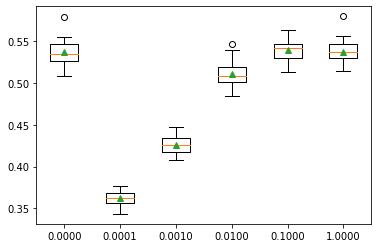

In [94]:
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 

# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, x_train, y_train):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
#x_train, y_train= get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, x_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.574
Accuracy score (validation): 0.564
Learning rate:  0.075
Accuracy score (training): 0.578
Accuracy score (validation): 0.569
Learning rate:  0.1
Accuracy score (training): 0.583
Accuracy score (validation): 0.574
Learning rate:  0.25
Accuracy score (training): 0.615
Accuracy score (validation): 0.603
Learning rate:  0.5
Accuracy score (training): 0.635
Accuracy score (validation): 0.612
Learning rate:  0.75
Accuracy score (training): 0.640
Accuracy score (validation): 0.614
Learning rate:  1
Accuracy score (training): 0.641
Accuracy score (validation): 0.602


In [325]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [326]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [327]:
feature_sel_model.get_support()

array([ True, False, False,  True, False,  True,  True, False, False,
        True, False,  True, False,  True])

In [328]:
# this is how we can make a list of the selected features
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(
#    np.sum(sel_.estimator_.coef_ == 0)))

total features: 14
selected features: 7


In [329]:
selected_feat

Index(['acousticness', 'instrumentalness', 'liveness', 'speechiness', 'year',
       'month', 'Minor'],
      dtype='object')

In [330]:
x_train=x_train[selected_feat]
x_test=x_test[selected_feat]

In [331]:
x_train

,acousticness,instrumentalness,liveness,speechiness,year,month,Minor
10397,0.720883,0.001560,0.106179,0.035847,0.544554,0.454545,0.0
1350,0.003332,0.001010,0.767892,0.062293,0.841584,0.000000,1.0
6822,0.221887,0.737000,0.400387,0.041219,0.504950,0.272727,0.0
4734,0.012348,0.000006,0.254810,0.178719,0.811881,0.454545,0.0
5215,0.006605,0.003490,0.064441,0.073037,0.653465,0.636364,1.0
...,...,...,...,...,...,...,...
5452,0.209839,0.001440,0.905324,0.037913,0.643564,0.909091,0.0
1993,0.105421,0.000103,0.213071,0.026963,0.910891,0.818182,0.0
541,0.138553,0.000048,0.069836,0.033678,0.613861,0.000000,0.0
11868,0.019477,0.000249,0.028810,0.029649,0.712871,0.000000,0.0


In [332]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [333]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  50.122649223221586
